In [1]:
import torch
import matplotlib.pyplot as plt
import libra_py.dynamics.bohmian.compute as compute
#import libra_py.dynamics.tsh.plot as tsh_plot
import libra_py.units as units

%matplotlib inline

# 1. Plotting quantum potentials

In [3]:
def plot_rho_quant_pot(X, sigma, mass, TBF, title):
    x = torch.linspace(-2.0, 2.0, 1001, requires_grad=True)
    rho, U = [], []
    for _x in x:
        f = TBF(_x.view(1,1), X, sigma) # compute.rho_lorentzian
        u = compute.quantum_potential_original_gen(_x.view(1,1), X, sigma, mass, TBF) #compute.rho_lorentzian)
        rho.append(f.detach())
        U.append(u.detach())
    x = x.detach()

    # Create 1 row, 2 columns of subplots
    fig, axs = plt.subplots(1, 2, figsize=(8, 4)) # sharex=True, sharey=True)
    
    axs[0].plot(x, rho, color="red") 
    axs[0].set_ylabel('Probability Density', fontsize=18)
    axs[1].plot(x, U, color="red") 
    axs[1].set_ylabel('Quantum Potential', fontsize=18)
    
    # Centered shared x-axis label
    fig.suptitle(title, fontsize=20)
    fig.supxlabel('Coordinate, a.u.', fontsize=18)
    plt.tight_layout()

In [4]:
X = torch.tensor([ [0.0], 
                   [1.0], 
                   [1.2] 
                 ])
sigma = torch.tensor([ [0.1],
                       [0.1], 
                       [0.1]
                     ])
mass = torch.tensor( [[1.0]] )

print(X.shape, X)
print(sigma.shape, sigma)
print(mass.shape, mass)

torch.Size([3, 1]) tensor([[0.0000],
        [1.0000],
        [1.2000]])
torch.Size([3, 1]) tensor([[0.1000],
        [0.1000],
        [0.1000]])
torch.Size([1, 1]) tensor([[1.]])


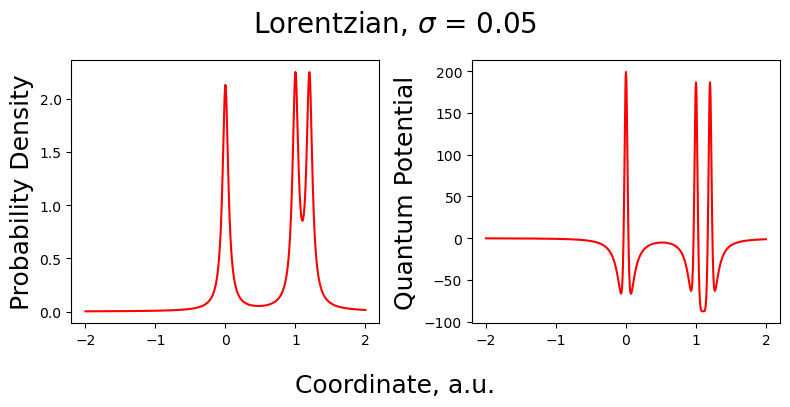

In [5]:
sigma = torch.tensor([ [0.05], [0.05], [0.05]])
plot_rho_quant_pot(X, sigma, mass, compute.rho_lorentzian, "Lorentzian, $\sigma$ = 0.05")

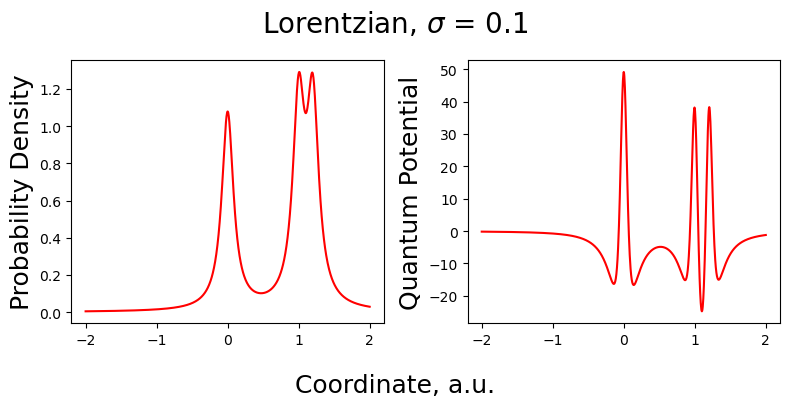

In [31]:
sigma = torch.tensor([ [0.1], [0.1], [0.1]])
plot_rho_quant_pot(X, sigma, mass, compute.rho_lorentzian, "Lorentzian, $\sigma$ = 0.1")

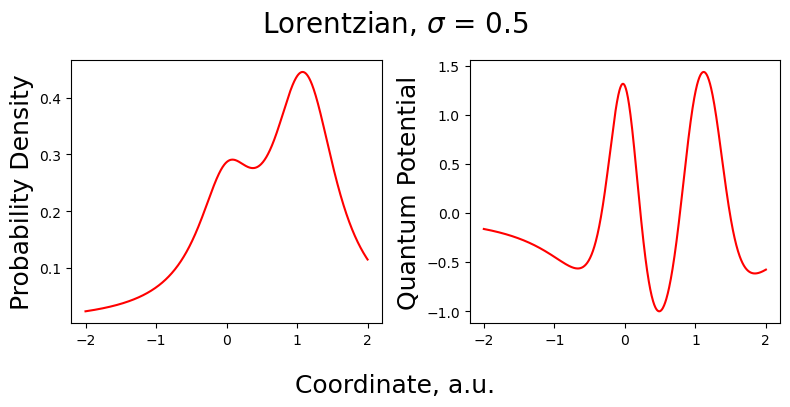

In [26]:
sigma = torch.tensor([ [0.5], [0.5], [0.5]])
plot_rho_quant_pot(X, sigma, mass, compute.rho_lorentzian, "Lorentzian, $\sigma$ = 0.5")

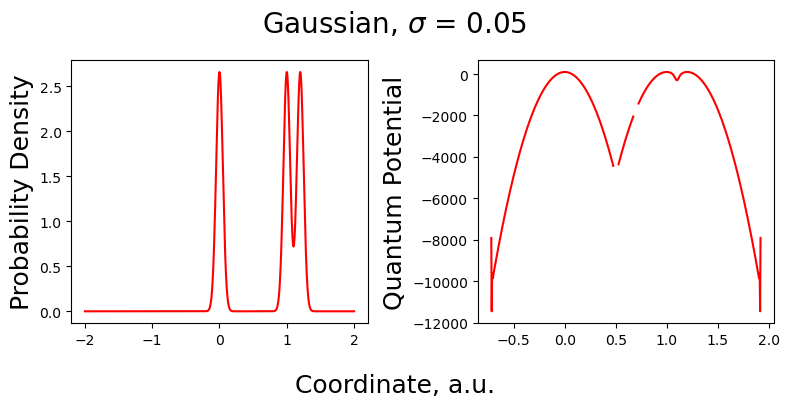

In [6]:
sigma = torch.tensor([ [0.05], [0.05], [0.05]])
plot_rho_quant_pot(X, sigma, mass, compute.rho_gaussian, "Gaussian, $\sigma$ = 0.05")

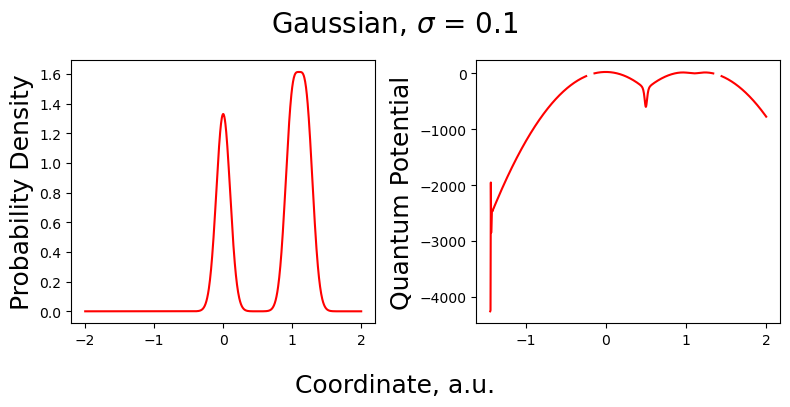

In [28]:
sigma = torch.tensor([ [0.1], [0.1], [0.1]])
plot_rho_quant_pot(X, sigma, mass, compute.rho_gaussian, "Gaussian, $\sigma$ = 0.1")

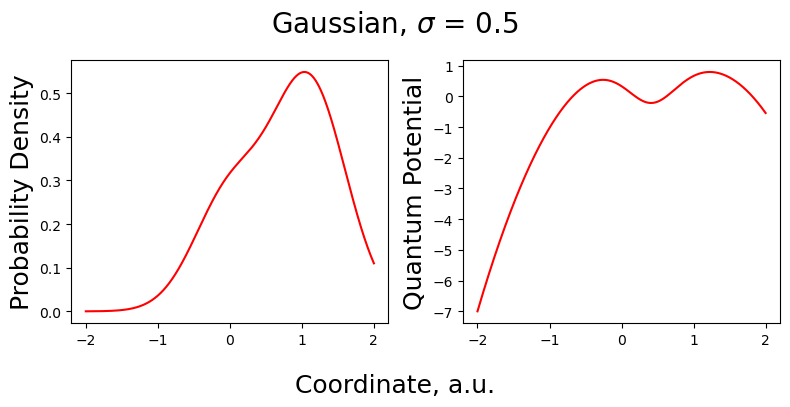

In [29]:
sigma = torch.tensor([ [0.5], [0.5], [0.5]])
plot_rho_quant_pot(X, sigma, mass, compute.rho_gaussian, "Gaussian, $\sigma$ = 0.5")

# 2. Plotting transmission probabilities

In [9]:
def plot_pop(plt, file_cl, file_bohm, file_qm, title):

    # Load the files
    f_cl = torch.load(file_cl)
    f_bo1 = torch.load(F"{file_bohm}-1.pt")  # sigma = 0.1, dt = 5
    f_bo2 = torch.load(F"{file_bohm}-2.pt")  # sigma = 0.5, dt = 5 
    f_bo3 = torch.load(F"{file_bohm}-3.pt")  # sigma = 0.05, dt = 5 - poor energy conservation
    f_bo3b = torch.load(F"{file_bohm}-3b.pt")# sigma = 0.05, dt = 2.5 - good energy conservation
    f_bo_best = torch.load(F"{file_bohm}-best.pt")  # selecting the best parameters for all cases 
    f_qm = torch.load(file_qm)
    
    
    plt.rc('axes', titlesize=24)      # fontsize of the axes title
    plt.rc('axes', labelsize=24)      # fontsize of the x and y labels
    plt.rc('legend', fontsize=24)     # legend fontsize
    plt.rc('xtick', labelsize=24)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=24)    # fontsize of the tick labels

    plt.rc('figure.subplot', left=0.2)
    plt.rc('figure.subplot', right=0.95)
    plt.rc('figure.subplot', bottom=0.13)
    plt.rc('figure.subplot', top=0.88)
    
    plt.figure(figsize=(4, 4)) # dpi=300, frameon=False)    
    plt.subplot(1, 1, 1)
    plt.xlim(0, 30)
    plt.ylim(0, 0.45)

    plt.title(F"{title}", fontsize=20)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.xlabel('Time, fs', fontsize=18)
    plt.ylabel('Probability', fontsize=18)

    t, P = f_cl["t"], f_cl["P"]
    plt.plot(t[:]/units.fs2au, P[:], label="classical", linewidth=5, color="red")


    t, P = f_bo2["t"], f_bo2["P"]
    plt.plot(t[:]/units.fs2au, P, label="bohmian, $\sigma$ = 0.5", linewidth=5, color="cyan")
    
    t, P = f_bo1["t"], f_bo1["P"]
    plt.plot(t[:]/units.fs2au, P, label="bohmian, $\sigma$ = 0.1", linewidth=5, color="blue")
    
    t, P = f_bo3b["t"], f_bo3b["P"]
    plt.plot(t[:]/units.fs2au, P, label="bohmian, $\sigma$ = 0.05", linewidth=5, color="black")

    #t, P = f_bo_best["t"], f_bo_best["P"]
    #plt.plot(t[:]/units.fs2au, P, label="bohmian, $\sigma$ = best", ls="dotted", color="black")
    
    t, P = torch.tensor(f_qm["time"]), f_qm["population_right"]
    plt.plot(t[:]/units.fs2au, P, label="quantum", linewidth=5, color="green")

    
    plt.legend(fontsize=12)
    plt.tight_layout()

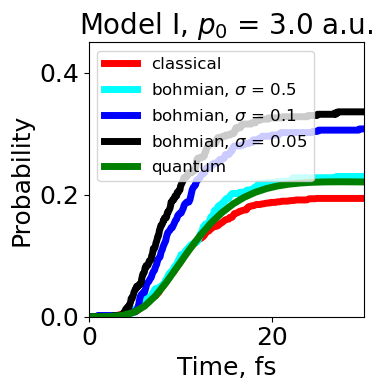

In [10]:
title = "Model I, $p_0$ = 3.0 a.u."
plot_pop(plt, "classical-MartensI-case1-1.pt", "bohmian-lorentzian-MartensI-case1", "MartensI-case1-exact.pt", title)

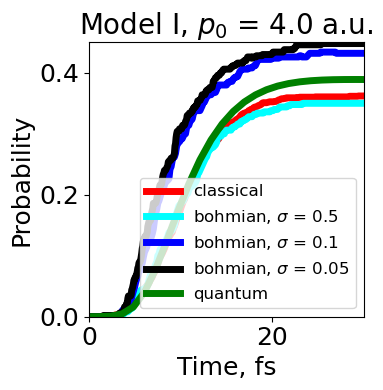

In [11]:
title = "Model I, $p_0$ = 4.0 a.u."
plot_pop(plt, "classical-MartensI-case2-1.pt", "bohmian-lorentzian-MartensI-case2", "MartensI-case2-exact.pt", title)

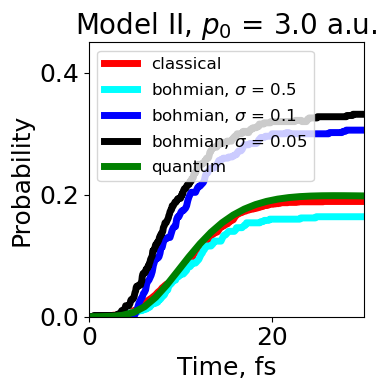

In [12]:
title = "Model II, $p_0$ = 3.0 a.u."
plot_pop(plt, "classical-MartensII-case1-1.pt", "bohmian-lorentzian-MartensII-case1", "MartensII-case1-exact.pt", title)

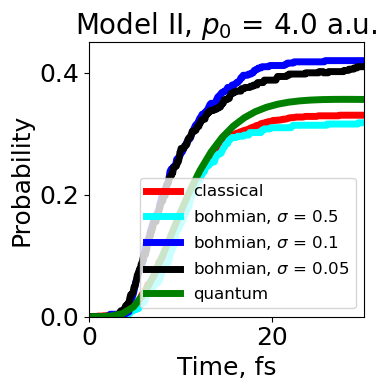

In [13]:
title = "Model II, $p_0$ = 4.0 a.u."
plot_pop(plt, "classical-MartensII-case2-1.pt", "bohmian-lorentzian-MartensII-case2", "MartensII-case2-exact.pt", title)

# 3. Plotting total energies

In [14]:
def plot_energy(plt, file_cl, file_bohm, file_qm, title):

    # Load the files
    f_cl = torch.load(file_cl)
    f_bo1 = torch.load(F"{file_bohm}-1.pt")  # sigma = 0.1, dt = 5
    f_bo2 = torch.load(F"{file_bohm}-2.pt")  # sigma = 0.5, dt = 5 
    f_bo3 = torch.load(F"{file_bohm}-3.pt")  # sigma = 0.05, dt = 5 - poor energy conservation
    f_bo3b = torch.load(F"{file_bohm}-3b.pt")# sigma = 0.05, dt = 2.5 - good energy conservation
    f_qm = torch.load(file_qm)
    
    
    plt.rc('axes', titlesize=24)      # fontsize of the axes title
    plt.rc('axes', labelsize=24)      # fontsize of the x and y labels
    plt.rc('legend', fontsize=24)     # legend fontsize
    plt.rc('xtick', labelsize=24)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=24)    # fontsize of the tick labels

    plt.rc('figure.subplot', left=0.2)
    plt.rc('figure.subplot', right=0.95)
    plt.rc('figure.subplot', bottom=0.13)
    plt.rc('figure.subplot', top=0.88)


    plt.figure(figsize=(4, 4)) # dpi=300, frameon=False)    
    plt.subplot(1, 1, 1)
    plt.xlim(0, 30)

    plt.title(F"{title}", fontsize=20)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.xlabel('Time, fs', fontsize=18)
    plt.ylabel('Energy, a.u.', fontsize=18)


    t, P = f_cl["t"], f_cl["E"][:, 3].detach()
    plt.plot(t[:]/units.fs2au, P[:], label="classical", linewidth=5, color="red")

    t, P = f_bo2["t"], f_bo2["E"][:, 3].detach()
    plt.plot(t[:]/units.fs2au, P, label="bohmian, $\sigma$ = 0.5", linewidth=5, color="cyan")

    t, P = f_bo1["t"], f_bo1["E"][:, 3].detach()
    plt.plot(t[:]/units.fs2au, P, label="bohmian, $\sigma$ = 0.1", linewidth=5, color="blue")
    
    t, P = f_bo3b["t"], f_bo3b["E"][:, 3].detach()
    plt.plot(t[:]/units.fs2au, P, label="bohmian, $\sigma$ = 0.05", linewidth=5, color="black")
    
    t, P = torch.tensor(f_qm["time"]), f_qm["total_energy"]
    plt.plot(t[:]/units.fs2au, P, label="quantum", linewidth=5, color="green")

    
    plt.legend(fontsize=12)
    plt.tight_layout()

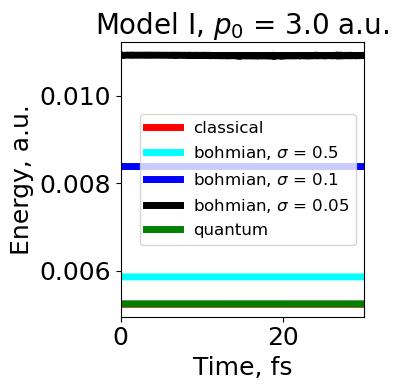

In [15]:
title = "Model I, $p_0$ = 3.0 a.u."
plot_energy(plt, "classical-MartensI-case1-1.pt", "bohmian-lorentzian-MartensI-case1", "MartensI-case1-exact.pt", title)

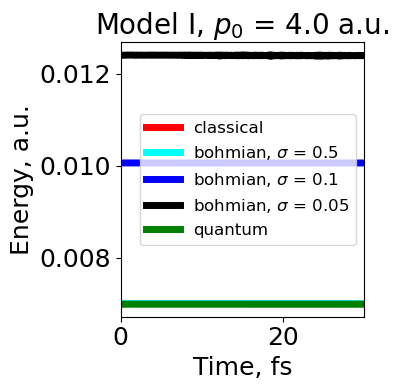

In [16]:
title = "Model I, $p_0$ = 4.0 a.u."
plot_energy(plt, "classical-MartensI-case2-1.pt", "bohmian-lorentzian-MartensI-case2", "MartensI-case2-exact.pt", title)

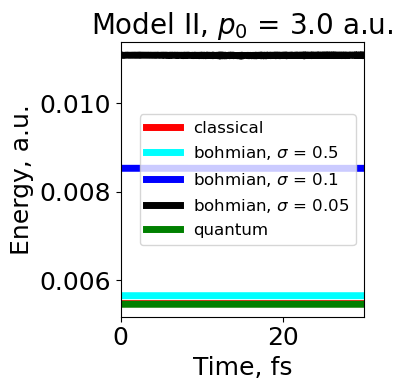

In [17]:
title = "Model II, $p_0$ = 3.0 a.u."
plot_energy(plt, "classical-MartensII-case1-1.pt", "bohmian-lorentzian-MartensII-case1", "MartensII-case1-exact.pt", title)

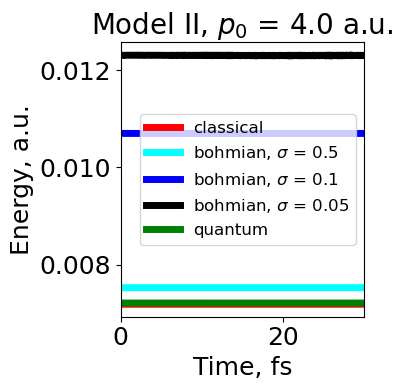

In [18]:
title = "Model II, $p_0$ = 4.0 a.u."
plot_energy(plt, "classical-MartensII-case2-1.pt", "bohmian-lorentzian-MartensII-case2", "MartensII-case2-exact.pt", title)

# 4. Plotting quantum dynamics

In [23]:
#f = torch.load("MartensI-case1-exact.pt")
def plot_quantum_dynamics(filename, title):
    
    f = torch.load(filename) #"MartensII-case1-exact.pt")
    # Create 2 row, 2 columns of subplots
    fig, axs = plt.subplots(2, 2, figsize=(6, 6), sharex=True, sharey=True)
    
    for num, i in enumerate([0, 100, 200, 290]):     
        n = f["save_every_n_steps"]
        dt = f["dt"]
        Q = f["Q"]
        V = f["V"]
        t = i * dt /units.fs2au
        psi = f["psi_all"][int(i/n)]
        rho = (torch.abs( psi ) )**2 
        a, b = int((num - num%2)/2), int(num % 2)
        axs[a, b].set_title(F"t = { round(t,0) } fs", fontsize=24)
        axs[a, b].set_xlim(-5.0, 5.0)
        axs[a, b].set_ylim(-2.0, 2.0)
    
        axs[a, b].contourf(Q[0], Q[1], rho, levels=100, cmap="hot")
        axs[a,b].contour(Q[0], Q[1], V, levels=100, colors='red', linestyles='--')

    # Centered shared x-axis label
    fig.suptitle(title, fontsize=24)
    fig.supxlabel('X coordinate, a.u.', fontsize=20)
    fig.supylabel('Y coordinate, a.u.', fontsize=20)
    plt.tight_layout()

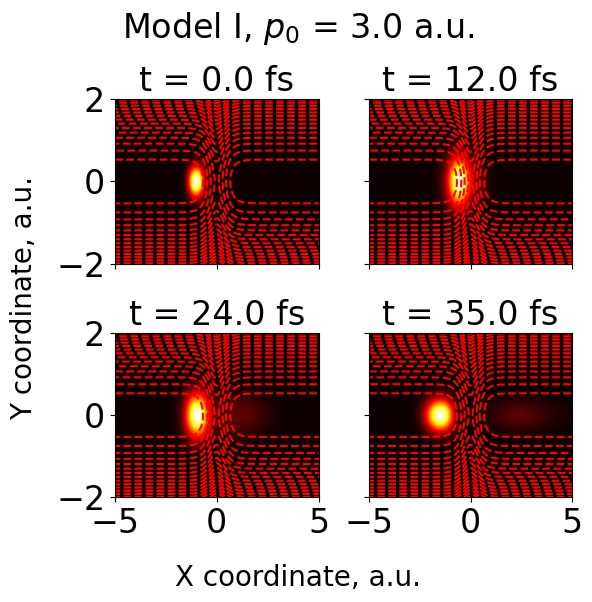

In [24]:
plot_quantum_dynamics("MartensI-case1-exact.pt", "Model I, $p_0$ = 3.0 a.u.")

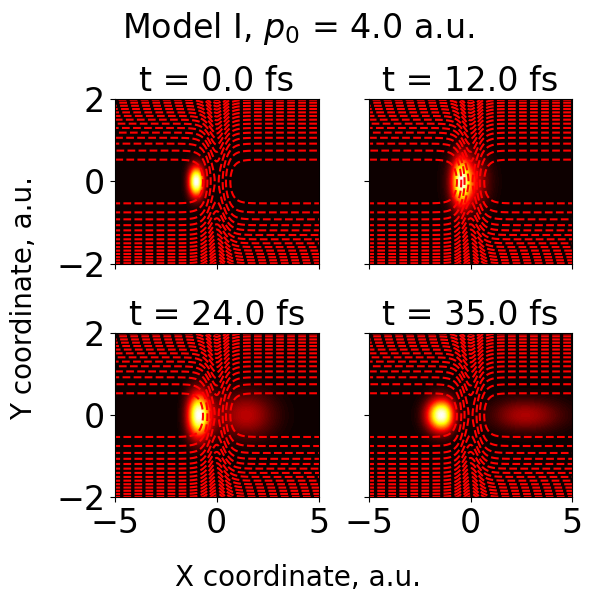

In [25]:
plot_quantum_dynamics("MartensI-case2-exact.pt", "Model I, $p_0$ = 4.0 a.u.")

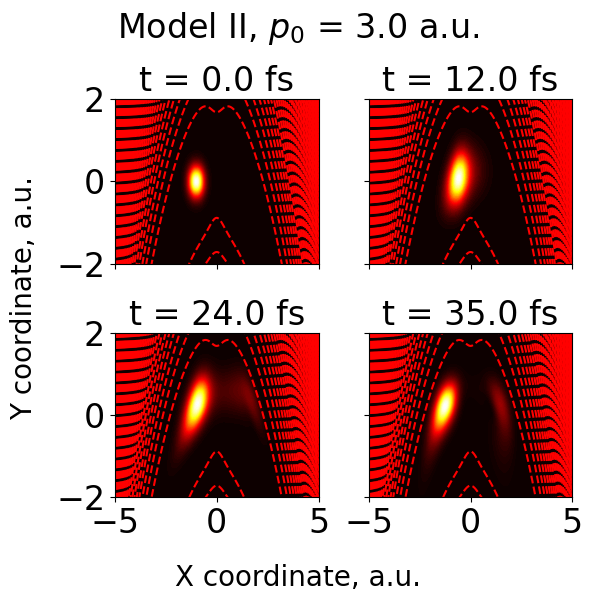

In [26]:
plot_quantum_dynamics("MartensII-case1-exact.pt", "Model II, $p_0$ = 3.0 a.u.")

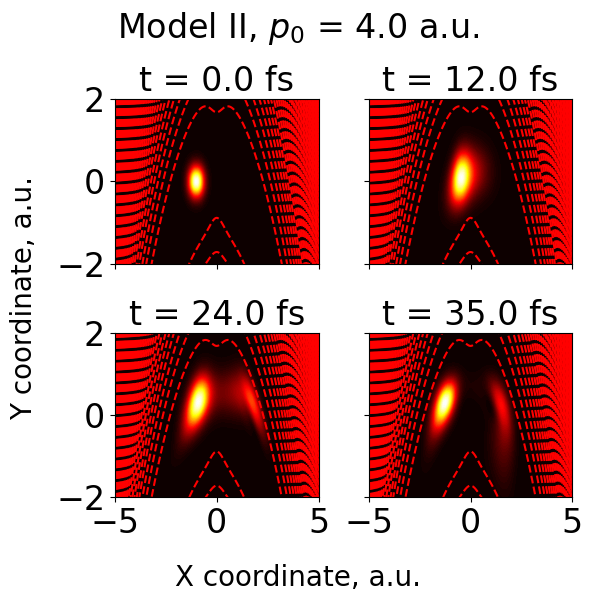

In [27]:
plot_quantum_dynamics("MartensII-case2-exact.pt", "Model II, $p_0$ = 4.0 a.u.")

# 5. Plotting trajectory dynamics

In [28]:
def plot_trajectory_dynamics(filename_quantum, filename, title):
    
    f = torch.load(filename_quantum) #"MartensII-case1-exact.pt")
    c = torch.load(filename) # trajectories 

    x = c["q_traj"][:,:,0].clone().detach()
    y = c["q_traj"][:,:,1].clone().detach()
    
    # Create 2 row, 2 columns of subplots
    fig, axs = plt.subplots(2, 2, figsize=(6, 6), sharex=True, sharey=True)
    
    for num, i in enumerate([0, 100, 200, 290]):         
        n = f["save_every_n_steps"]
        dt = f["dt"]
        Q = f["Q"]
        V = f["V"]
        t = i * dt /units.fs2au
        psi = f["psi_all"][int(i/n)]
        rho = (torch.abs( psi ) )**2 
        a, b = int((num - num%2)/2), int(num % 2)
        axs[a, b].set_title(F"t = { round(t,0) } fs", fontsize=24)
        axs[a, b].set_xlim(-5.0, 5.0)
        axs[a, b].set_ylim(-2.0, 2.0)
    
        axs[a, b].scatter(x[i, :], y[i, :], color="red") #contourf(Q[0], Q[1], rho, levels=100, cmap="hot")
        axs[a, b].contour(Q[0], Q[1], V, levels=100, colors='red', linestyles='--')

    # Centered shared x-axis label
    fig.suptitle(title, fontsize=24)
    fig.supxlabel('X coordinate, a.u.', fontsize=20)
    fig.supylabel('Y coordinate, a.u.', fontsize=20)
    plt.tight_layout()

## 5.1. Model I

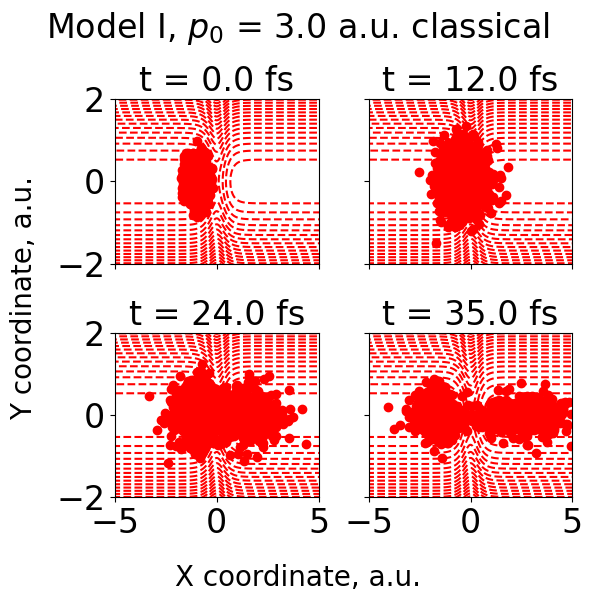

In [29]:
plot_trajectory_dynamics("MartensI-case1-exact.pt", "classical-MartensI-case1-1.pt", "Model I, $p_0$ = 3.0 a.u. classical")

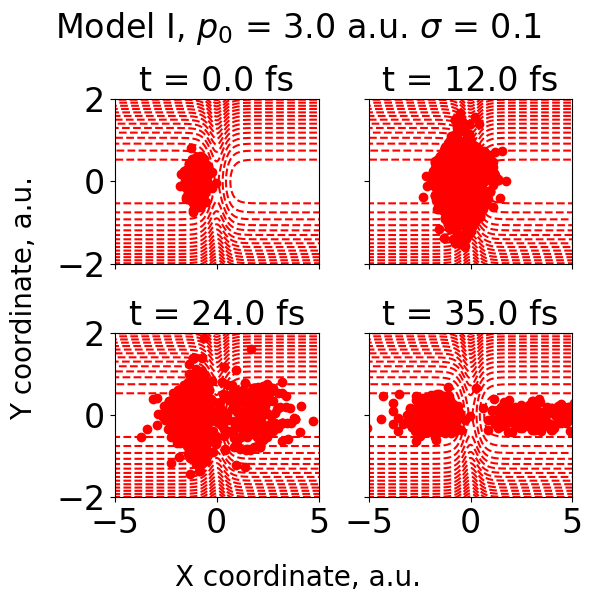

In [30]:
plot_trajectory_dynamics("MartensI-case1-exact.pt", "bohmian-lorentzian-MartensI-case1-1.pt", "Model I, $p_0$ = 3.0 a.u. $\sigma$ = 0.1")

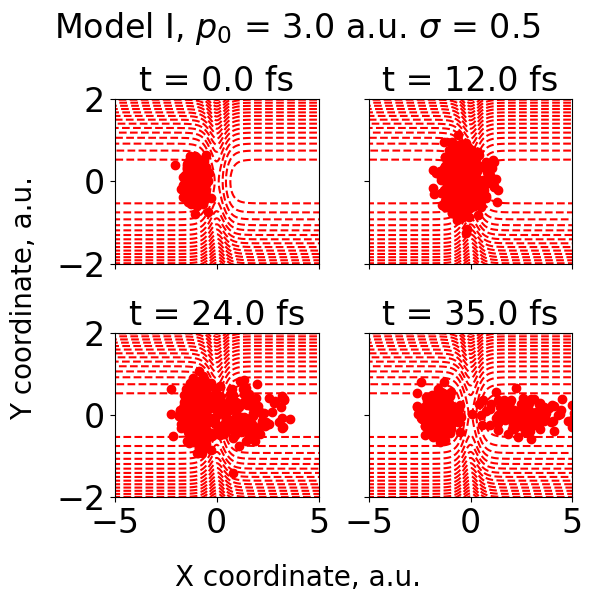

In [31]:
plot_trajectory_dynamics("MartensI-case1-exact.pt", "bohmian-lorentzian-MartensI-case1-2.pt", "Model I, $p_0$ = 3.0 a.u. $\sigma$ = 0.5")

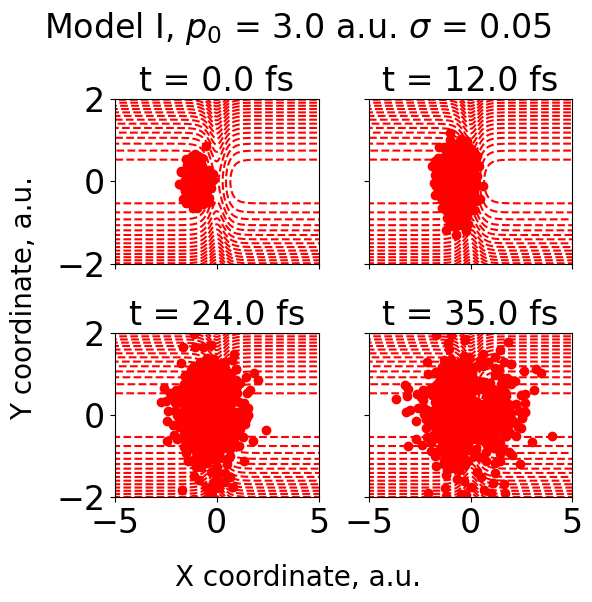

In [32]:
plot_trajectory_dynamics("MartensI-case1-exact.pt", "bohmian-lorentzian-MartensI-case1-3b.pt", "Model I, $p_0$ = 3.0 a.u. $\sigma$ = 0.05")

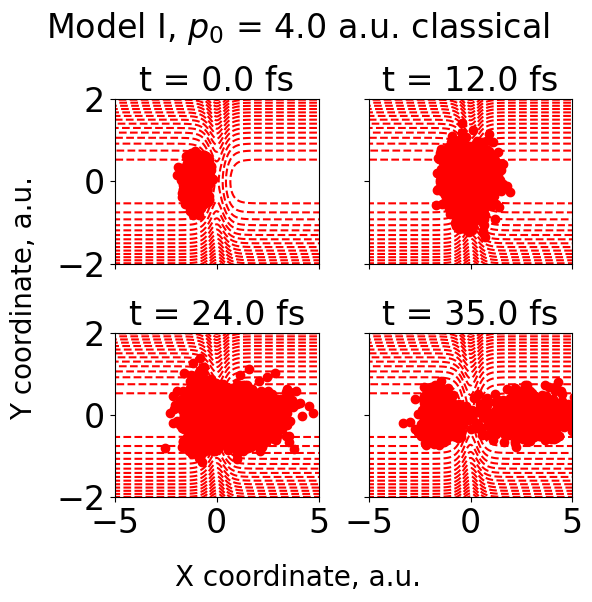

In [33]:
plot_trajectory_dynamics("MartensI-case2-exact.pt", "classical-MartensI-case2-1.pt", "Model I, $p_0$ = 4.0 a.u. classical")

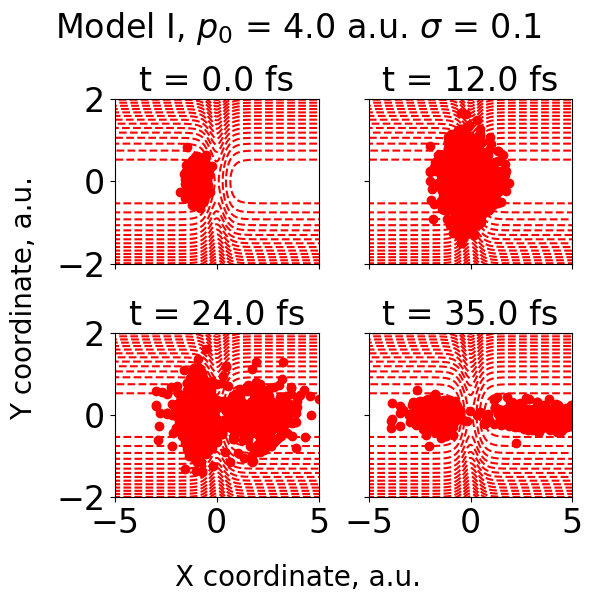

In [34]:
plot_trajectory_dynamics("MartensI-case2-exact.pt", "bohmian-lorentzian-MartensI-case2-1.pt", "Model I, $p_0$ = 4.0 a.u. $\sigma$ = 0.1")

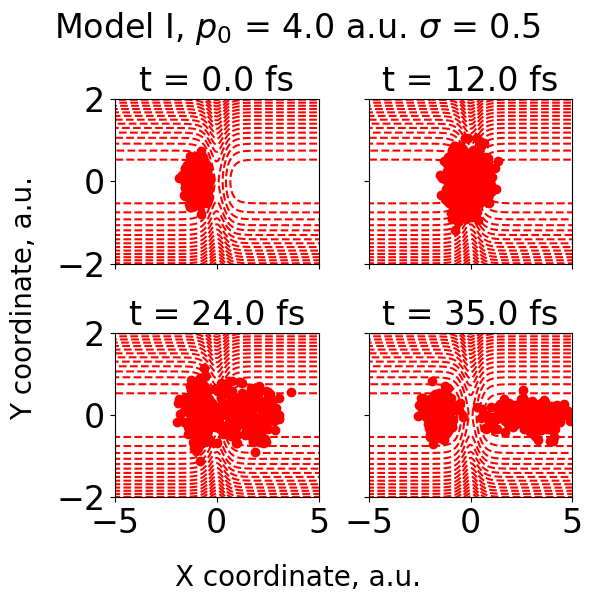

In [35]:
plot_trajectory_dynamics("MartensI-case2-exact.pt", "bohmian-lorentzian-MartensI-case2-2.pt", "Model I, $p_0$ = 4.0 a.u. $\sigma$ = 0.5")

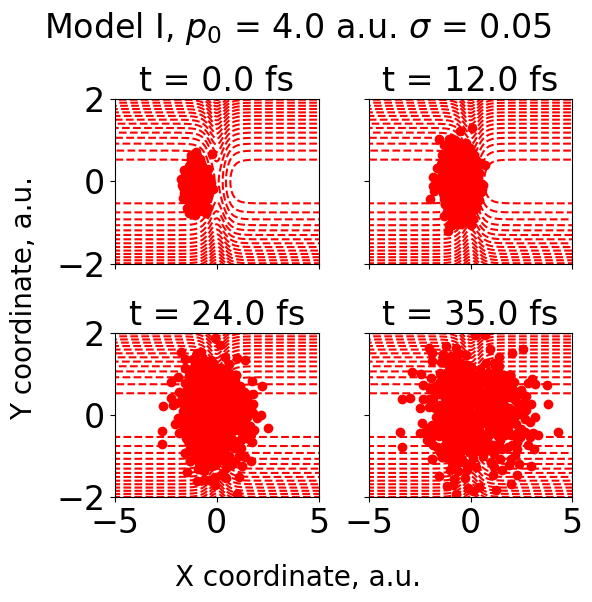

In [36]:
plot_trajectory_dynamics("MartensI-case2-exact.pt", "bohmian-lorentzian-MartensI-case2-3b.pt", "Model I, $p_0$ = 4.0 a.u. $\sigma$ = 0.05")

## 5.2. Model II

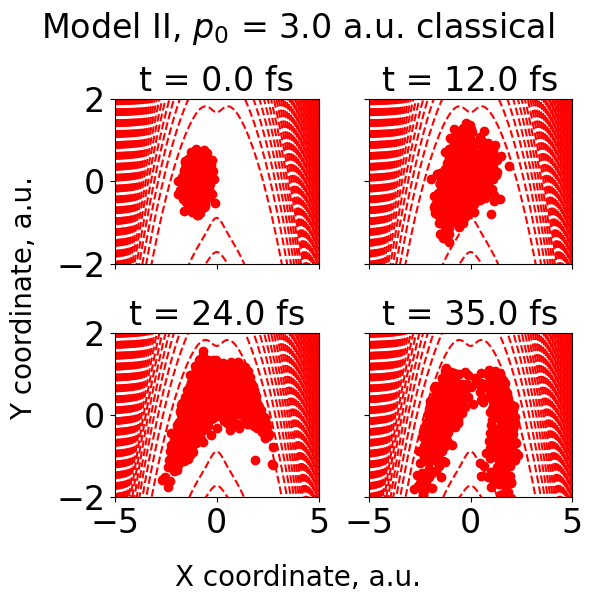

In [37]:
plot_trajectory_dynamics("MartensII-case1-exact.pt", "classical-MartensII-case1-1.pt", "Model II, $p_0$ = 3.0 a.u. classical")

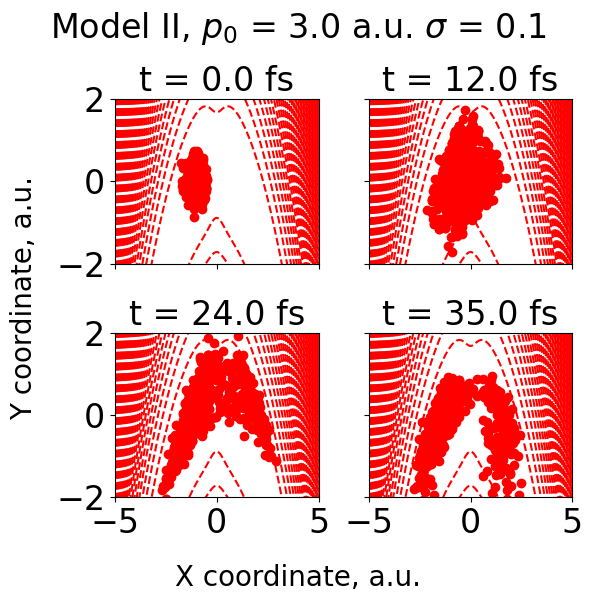

In [38]:
plot_trajectory_dynamics("MartensII-case1-exact.pt", "bohmian-lorentzian-MartensII-case1-1.pt", "Model II, $p_0$ = 3.0 a.u. $\sigma$ = 0.1")

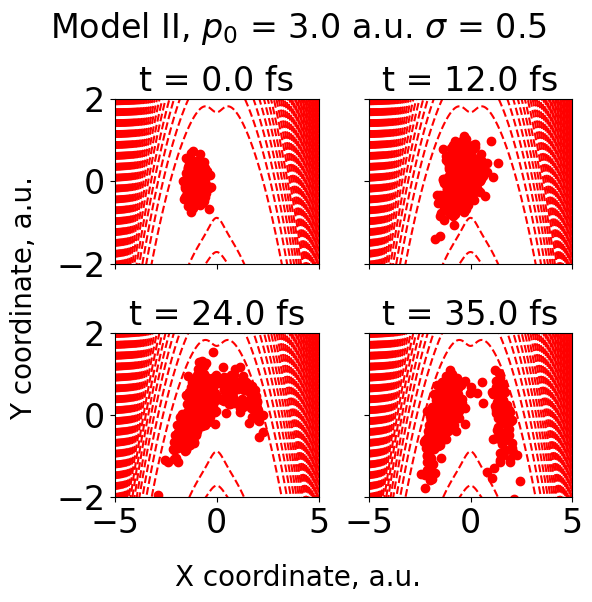

In [39]:
plot_trajectory_dynamics("MartensII-case1-exact.pt", "bohmian-lorentzian-MartensII-case1-2.pt", "Model II, $p_0$ = 3.0 a.u. $\sigma$ = 0.5")

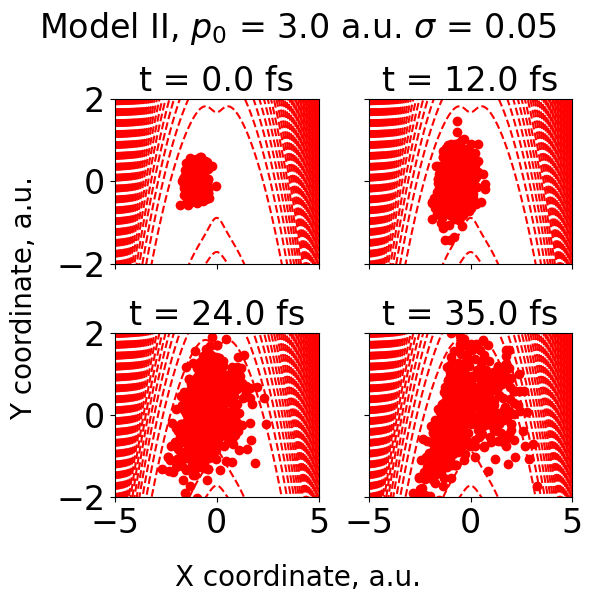

In [40]:
plot_trajectory_dynamics("MartensII-case1-exact.pt", "bohmian-lorentzian-MartensII-case1-3b.pt", "Model II, $p_0$ = 3.0 a.u. $\sigma$ = 0.05")

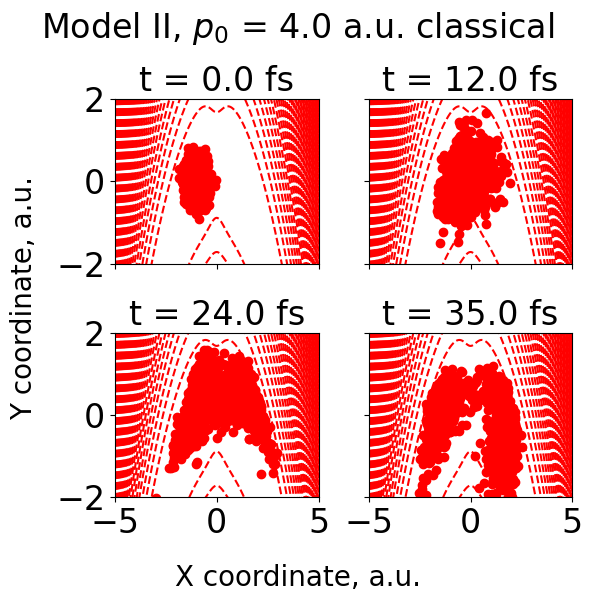

In [41]:
plot_trajectory_dynamics("MartensII-case2-exact.pt", "classical-MartensII-case2-1.pt", "Model II, $p_0$ = 4.0 a.u. classical")

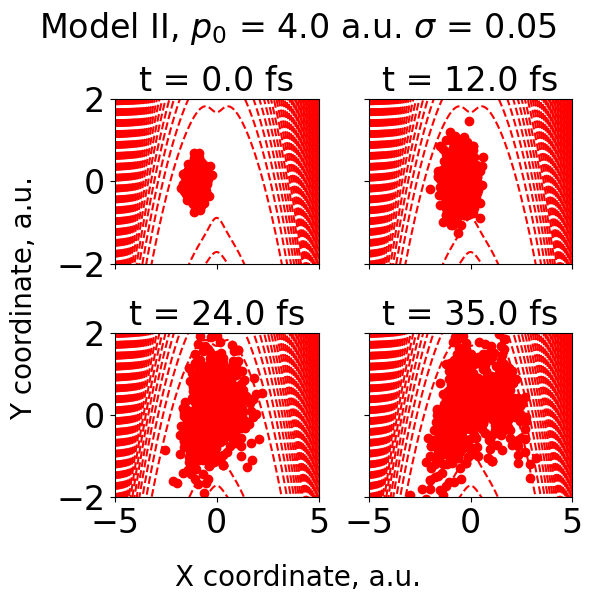

In [42]:
plot_trajectory_dynamics("MartensII-case2-exact.pt", "bohmian-lorentzian-MartensII-case2-3b.pt", "Model II, $p_0$ = 4.0 a.u. $\sigma$ = 0.05")

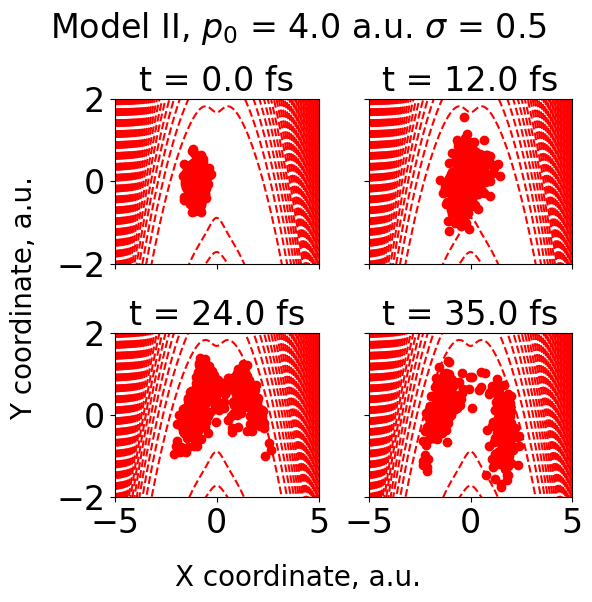

In [43]:
plot_trajectory_dynamics("MartensII-case2-exact.pt", "bohmian-lorentzian-MartensII-case2-2.pt", "Model II, $p_0$ = 4.0 a.u. $\sigma$ = 0.5")

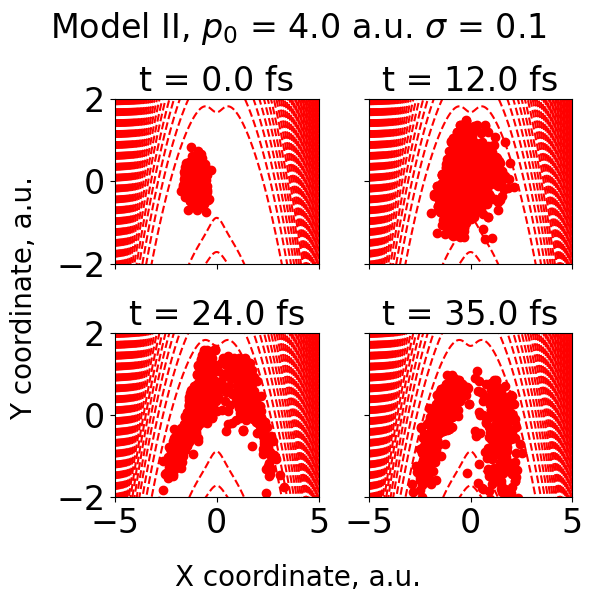

In [44]:
plot_trajectory_dynamics("MartensII-case2-exact.pt", "bohmian-lorentzian-MartensII-case2-1.pt", "Model II, $p_0$ = 4.0 a.u. $\sigma$ = 0.1")